In [1]:
import numpy as np
import pandas as pd
from spec_id import Scale_model,Gen_spec
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import grizli
from glob import glob
from scipy.interpolate import interp1d
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)
pandas2ri.activate()

In [2]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
lzDB = galDB.query('z_grism < 1.16')
mzDB = galDB.query('1.16 < z_grism < 1.3')
hzDB = galDB.query('1.3 < z_grism < 1.45')
uhzDB = galDB.query('1.45 < z_grism')


metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
dust=np.round(np.arange(0.0,1.1,0.1),1)
M,A=np.meshgrid(metal,age)

In [3]:
wv,fl = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a2.5_t0_spec.npy')

In [4]:
sp = Gen_spec('n21156',1.249)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

In [20]:
sp.Sim_spec_mult(wv,fl)
ifl = interp1d(sp.mwv,sp.fl)(sp.gal_wv)
ifl /= sp.filt
ifl *= Scale_model(sp.gal_fl,sp.gal_er,ifl)

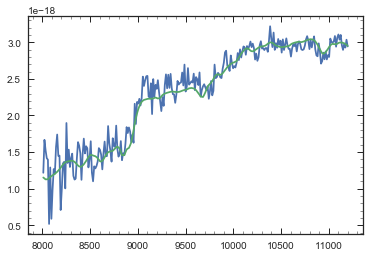

In [21]:
plt.plot(sp.gal_wv,sp.gal_fl)
plt.plot(sp.gal_wv,ifl)

In [31]:
chi1 = np.zeros(age.size)
chi2 = np.zeros(age.size)

for i in range(len(age)):
    wv,fl = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a{0}_t8.85_spec.npy'.format(age[i]))
    sp.Sim_spec_mult(wv,fl)
    ifl = interp1d(sp.mwv,sp.fl)(sp.gal_wv)
    ifl /= sp.filt
    ifl *= Scale_model(sp.gal_fl,sp.gal_er,ifl)    
    chi1[i]=sum(((sp.gal_fl - ifl)/sp.gal_er)**2)
    
    wv,fl = np.load('/Users/vestrada/fsps_models_for_fit/fsps_spec/m0.019_a{0}_dt8.85_spec.npy'.format(age[i]))
    sp.Sim_spec_mult(wv,fl)
    ifl = interp1d(sp.mwv,sp.fl)(sp.gal_wv)
    ifl /= sp.filt
    ifl *= Scale_model(sp.gal_fl,sp.gal_er,ifl)    
    chi2[i]=sum(((sp.gal_fl - ifl)/sp.gal_er)**2)

p1 = np.exp(-chi1/2)
p2 = np.exp(-chi2/2)

p1 /= np.trapz(p1,age)
p2 /= np.trapz(p2,age)

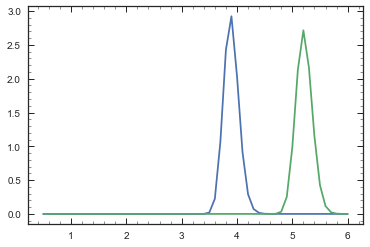

In [32]:
plt.plot(age,p1)
plt.plot(age,p2)